# Exploring Ultimate Fighting Championship (UFC) Trends and Predicting Fight Outcomes

---

### Objectives

- Analyze trends in UFC events, fighters, and outcomes.
- Perform regression to predict fight outcomes or another relevant metric.
- Create actionable insights and compelling visuals.

### Tools

- Python: Data cleaning, analysis, regression modeling.
- Tableau: Interactive dashboards and visualizations.

### Research Questions

These guide our analysis:

- What trends can be observed in UFC events over time?
- Which weight classes and fighters are most dominant?
- What are the common methods of victory?
- How do fighter statistics correlate with victory?
- Can we predict fight outcomes using regression?

### Exploratory Data Analysis (EDA)

In [11]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import zipfile 
import kaggle

In [12]:
# Download programmatically the dataset from Kaggle using the Kaggle API

!kaggle datasets download -d syedanwarafridi/ufc-events-data-till-2023

ufc-events-data-till-2023.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
# Extract the file from the download zip file

zipfile_name = 'ufc-events-data-till-2023.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [14]:
# Read in the csv file as a pandas dataframe

ufc_data = pd.read_csv('ufc.csv', encoding = 'latin1')

In [15]:
# Have a first look at the dataset

ufc_data.head(5)

,Location,Fighter 1,Fighter 2,Fighter_1_KD,Fighter_2_KD,Fighter_1_STR,Fighter_2_STR,Fighter_1_TD,Fighter_2_TD,Fighter_1_SUB,Fighter_2_SUB,Weight_Class,Method,Round,Time,Event Name,Date,Winner
0,"Austin, Texas, USA",Arman Tsarukyan,Beneil Dariush,1.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punch,1.0,1:04,UFC Fight Night,2-Dec-23,Arman Tsarukyan
1,"Austin, Texas, USA",Jalin Turner,Bobby Green,1.0,0.0,33.0,15.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punches,1.0,2:49,UFC Fight Night,2-Dec-23,Jalin Turner
2,"Austin, Texas, USA",Deiveson Figueiredo,Rob Font,0.0,0.0,45.0,46.0,4.0,0.0,0.0,0.0,Bantamweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Deiveson Figueiredo
3,"Austin, Texas, USA",Sean Brady,Kelvin Gastelum,0.0,0.0,14.0,18.0,5.0,0.0,3.0,0.0,Welterweight,SUB Kimura,3.0,1:43,UFC Fight Night,2-Dec-23,Sean Brady
4,"Austin, Texas, USA",Joaquim Silva,Clay Guida,0.0,0.0,46.0,43.0,2.0,2.0,2.0,0.0,Lightweight,U-DEC,3.0,5:00,UFC Fight Night,2-Dec-23,Joaquim Silva


In [16]:
# Show the data structure

ufc_data.shape

(7417, 18)

In [17]:
# Illustrate more info about the dataset

ufc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7417 entries, 0 to 7416
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       7417 non-null   object 
 1   Fighter 1      7417 non-null   object 
 2   Fighter 2      7413 non-null   object 
 3   Fighter_1_KD   7413 non-null   float64
 4   Fighter_2_KD   7413 non-null   float64
 5   Fighter_1_STR  7413 non-null   float64
 6   Fighter_2_STR  7413 non-null   float64
 7   Fighter_1_TD   7413 non-null   float64
 8   Fighter_2_TD   7413 non-null   float64
 9   Fighter_1_SUB  7413 non-null   float64
 10  Fighter_2_SUB  7413 non-null   float64
 11  Weight_Class   7413 non-null   object 
 12  Method         7413 non-null   object 
 13  Round          7413 non-null   float64
 14  Time           7413 non-null   object 
 15  Event Name     7413 non-null   object 
 16  Date           7412 non-null   object 
 17  Winner         7414 non-null   object 
dtypes: float

In [18]:
# Convert column names to lowercase

ufc_data.columns = ufc_data.columns.str.lower()

# Convert column names to snake_case

ufc_data.columns = ufc_data.columns.str.replace(' ', '_')

In [19]:
# Check data type

ufc_data.dtypes

location          object
fighter_1         object
fighter_2         object
fighter_1_kd     float64
fighter_2_kd     float64
fighter_1_str    float64
fighter_2_str    float64
fighter_1_td     float64
fighter_2_td     float64
fighter_1_sub    float64
fighter_2_sub    float64
weight_class      object
method            object
round            float64
time              object
event_name        object
date              object
winner            object
dtype: object

In [20]:
# Check for missing values

print(ufc_data.isnull().sum())

location         0
fighter_1        0
fighter_2        4
fighter_1_kd     4
fighter_2_kd     4
fighter_1_str    4
fighter_2_str    4
fighter_1_td     4
fighter_2_td     4
fighter_1_sub    4
fighter_2_sub    4
weight_class     4
method           4
round            4
time             4
event_name       4
date             5
winner           3
dtype: int64


In [21]:
# Drop missing values in this situation

ufc_data = ufc_data.dropna()
ufc_data.isna().sum()

location         0
fighter_1        0
fighter_2        0
fighter_1_kd     0
fighter_2_kd     0
fighter_1_str    0
fighter_2_str    0
fighter_1_td     0
fighter_2_td     0
fighter_1_sub    0
fighter_2_sub    0
weight_class     0
method           0
round            0
time             0
event_name       0
date             0
winner           0
dtype: int64

In [22]:
# Check and remove duplicates

print(f"Duplicate rows: {ufc_data.duplicated().sum()}")
ufc_data.drop_duplicates(inplace=True)

Duplicate rows: 0


In [23]:
# Check for unique value in the dataset 

ufc_data.nunique()

location          168
fighter_1        1699
fighter_2        2301
fighter_1_kd        6
fighter_2_kd        4
fighter_1_str     197
fighter_2_str     161
fighter_1_td       17
fighter_2_td       11
fighter_1_sub      11
fighter_2_sub       8
weight_class       15
method             70
round               5
time              336
event_name        318
date              666
winner           1695
dtype: int64

In [24]:
# Check the 'date' column inconsistent formats or invalid date values

print(ufc_data['date'].head())
print(ufc_data['date'].unique())

0    2-Dec-23
1    2-Dec-23
2    2-Dec-23
3    2-Dec-23
4    2-Dec-23
Name: date, dtype: object
['2-Dec-23' '18-Nov-23' '11-Nov-23' '4-Nov-23' '21-Oct-23' '14-Oct-23'
 '7-Oct-23' '23-Sep-23' '16-Sep-23' '9-Sep-23' '2-Sep-23' '26-Aug-23'
 '19-Aug-23' '12-Aug-23' '5-Aug-23' '29-Jul-23' '22-Jul-23' '15-Jul-23'
 '8-Jul-23' '1-Jul-23' '24-Jun-23' '17-Jun-23' '10-Jun-23' '3-Jun-23'
 '20-May-23' '13-May-23' '6-May-23' '29-Apr-23' '22-Apr-23' '15-Apr-23'
 '8-Apr-23' '25-Mar-23' '18-Mar-23' '11-Mar-23' '4-Mar-23' '25-Feb-23'
 '18-Feb-23' '11-Feb-23' '4-Feb-23' '21-Jan-23' '14-Jan-23' '17-Dec-22'
 '10-Dec-22' '3-Dec-22' '19-Nov-22' '12-Nov-22' '5-Nov-22' '29-Oct-22'
 '22-Oct-22' '15-Oct-22' '1-Oct-22' '17-Sep-22' '10-Sep-22' '3-Sep-22'
 '20-Aug-22' '13-Aug-22' '6-Aug-22' '30-Jul-22' '23-Jul-22' '16-Jul-22'
 '9-Jul-22' '2-Jul-22' '25-Jun-22' '18-Jun-22' '11-Jun-22' '4-Jun-22'
 '21-May-22' '14-May-22' '7-May-22' '30-Apr-22' '23-Apr-22' '16-Apr-22'
 '9-Apr-22' '26-Mar-22' '19-Mar-22' '12-Mar-22' '5

In [25]:
# Specify a date format

ufc_data['date'] = pd.to_datetime(ufc_data['date'], format='%d-%b-%y', errors='coerce')

In [26]:
# Convert the Date column to datetime format

ufc_data['date'] = pd.to_datetime(ufc_data['date'], errors='coerce')

# Extract year and month from the Date column

ufc_data['year'] = ufc_data['date'].dt.year
ufc_data['month'] = ufc_data['date'].dt.month

In [27]:
# Have a look at our dataset after preprocessing

ufc_data.head(5)

,location,fighter_1,fighter_2,fighter_1_kd,fighter_2_kd,fighter_1_str,fighter_2_str,fighter_1_td,fighter_2_td,fighter_1_sub,fighter_2_sub,weight_class,method,round,time,event_name,date,winner,year,month
0,"Austin, Texas, USA",Arman Tsarukyan,Beneil Dariush,1.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punch,1.0,1:04,UFC Fight Night,2023-12-02,Arman Tsarukyan,2023,12
1,"Austin, Texas, USA",Jalin Turner,Bobby Green,1.0,0.0,33.0,15.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punches,1.0,2:49,UFC Fight Night,2023-12-02,Jalin Turner,2023,12
2,"Austin, Texas, USA",Deiveson Figueiredo,Rob Font,0.0,0.0,45.0,46.0,4.0,0.0,0.0,0.0,Bantamweight,U-DEC,3.0,5:00,UFC Fight Night,2023-12-02,Deiveson Figueiredo,2023,12
3,"Austin, Texas, USA",Sean Brady,Kelvin Gastelum,0.0,0.0,14.0,18.0,5.0,0.0,3.0,0.0,Welterweight,SUB Kimura,3.0,1:43,UFC Fight Night,2023-12-02,Sean Brady,2023,12
4,"Austin, Texas, USA",Joaquim Silva,Clay Guida,0.0,0.0,46.0,43.0,2.0,2.0,2.0,0.0,Lightweight,U-DEC,3.0,5:00,UFC Fight Night,2023-12-02,Joaquim Silva,2023,12


Looks great! Let's start our analysis based on the research questions mentioned above.

---

**Question 1:** What trends can be observed in UFC events over time? <br>
**Hypothesis:** The number of UFC events has steadily increased over time, with specific locations hosting more events due to their popularity or regional growth of the sport.

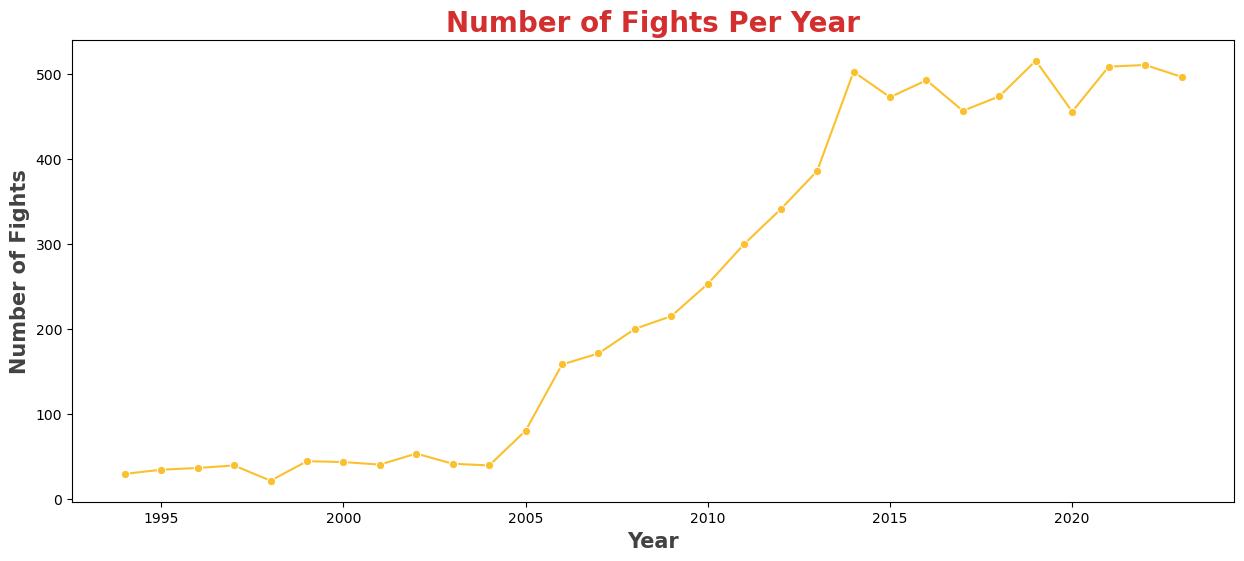

In [31]:
# Count fights per year
fights_per_year = ufc_data.groupby('year').size().reset_index(name='number_of_fights')

# Plot trends over time

plt.figure(figsize=(15, 6))
sns.lineplot(data=fights_per_year, x='year', y='number_of_fights', marker='o', color="#FBC02D")
plt.title('Number of Fights Per Year', fontweight = 'heavy', color = "#D32F2F", size = 20)
plt.xlabel('Year', fontweight = 'heavy', size = 15, color = '#424242')
plt.ylabel('Number of Fights', fontweight = 'heavy', size = 15, color = '#424242')
plt.grid(visible=False)
plt.show()

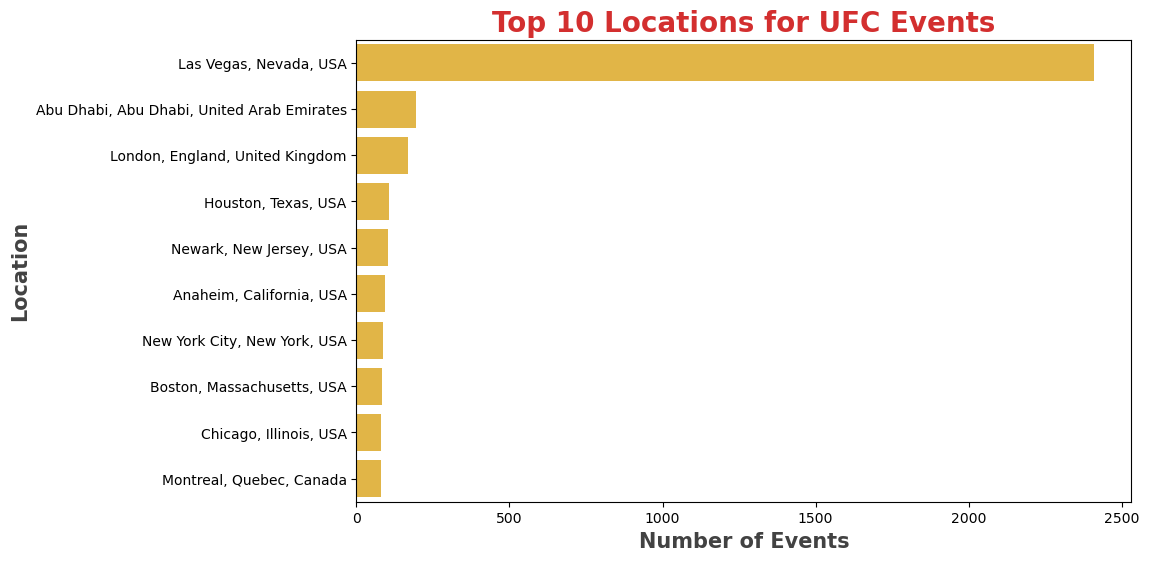

In [32]:
# Top locations for events

top_locations = ufc_data['location'].value_counts().head(10)

# Plot top locations

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, color="#FBC02D")
plt.title('Top 10 Locations for UFC Events', fontweight = 'heavy', color = "#D32F2F", size = 20)
plt.xlabel('Number of Events', fontweight = 'heavy', size = 15, color = '#424242')
plt.ylabel('Location', fontweight = 'heavy', size = 15, color = '#424242')
plt.show()

**Observation:** <br>
The significant increase in UFC events starting from 2005 can be attributed to the sport's growing popularity, driven by enhanced marketing, the rise of high-profile fighters, and increased global media coverage.​
This period marked a surge in UFC visibility, particularly in mainstream media, and the sport became more accessible through streaming services. Las Vegas, with its strong sports entertainment infrastructure, remains the top location for UFC events, while Abu Dhabi's increasing presence reflects the sport's expansion into new global markets

---

**Question 2:** Which weight classes and fighters are most dominant? <br>
**Hypothesis:** Specific weight classes, such as Lightweight and Heavyweight, have the most fights and victories due to their historical significance and popularity. Certain fighters will have significantly higher win ratios.

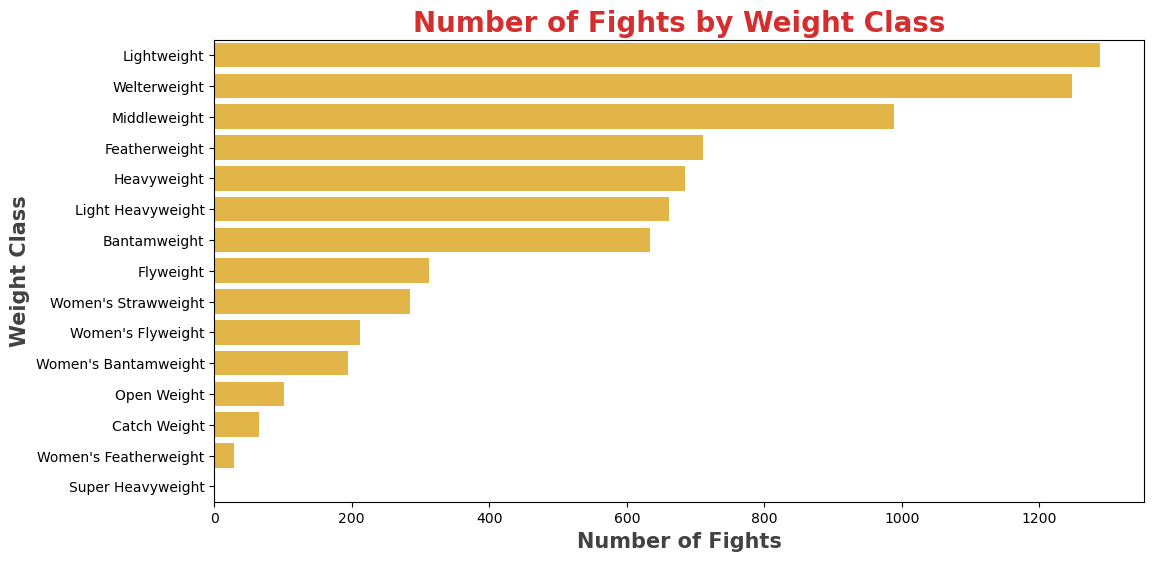

In [36]:
# Count number of fights by weight class

fights_by_weight_class = ufc_data['weight_class'].value_counts()

# Plot weight class distribution

plt.figure(figsize=(12, 6))
sns.barplot(x=fights_by_weight_class.values, y=fights_by_weight_class.index, color="#FBC02D")
plt.title('Number of Fights by Weight Class', fontweight = 'heavy', color = "#D32F2F", size = 20)
plt.xlabel('Number of Fights', fontweight = 'heavy', size = 15, color = '#424242')
plt.ylabel('Weight Class', fontweight = 'heavy', size = 15, color = '#424242')
plt.show()

**Observation:** <br>
The bar chart displaying the number of UFC fights per weight class supports our hypothesis that certain weight classes, like Lightweight and Heavyweight, dominate in terms of the number of fights. The Lightweight class ranks as the top weight class with the highest number of fights, followed by Welterweight and Middleweight. This trend can be attributed to the historical significance and popularity of these divisions, which often feature fast-paced, action-packed bouts that attract a large fan base. The Lightweight class, in particular, is known for its depth of talent and has consistently been a central focus in UFC events. 

In [38]:
# Reprocess the dataset to avoid any possible mistakes

ufc_data['winner'] = ufc_data['winner'].fillna('No Contest')  
ufc_data['fighter_1'] = ufc_data['fighter_1'].str.strip()  
ufc_data['fighter_2'] = ufc_data['fighter_2'].str.strip()

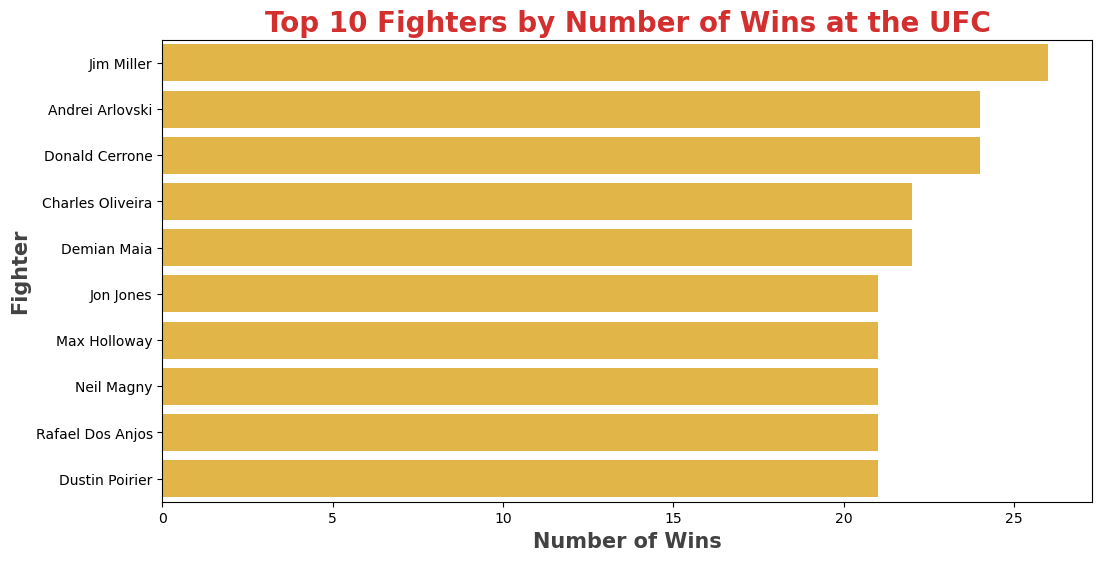

In [39]:
# Count wins per fighter

wins_by_fighter = ufc_data.groupby('winner').size().sort_values(ascending=False).head(10)

# Plot top 10 dominant fighters by number of wins

plt.figure(figsize=(12, 6))
sns.barplot(x=wins_by_fighter.values, y=wins_by_fighter.index, color="#FBC02D")
plt.title('Top 10 Fighters by Number of Wins at the UFC', fontweight = 'heavy', color = "#D32F2F", size = 20)
plt.xlabel('Number of Wins', fontweight = 'heavy', size = 15, color = '#424242')
plt.ylabel('Fighter', fontweight = 'heavy', size = 15, color = '#424242')
plt.show()

Now, let's dive deeper in our analysis and check the top fighters with highest win ratio over the past 5 years

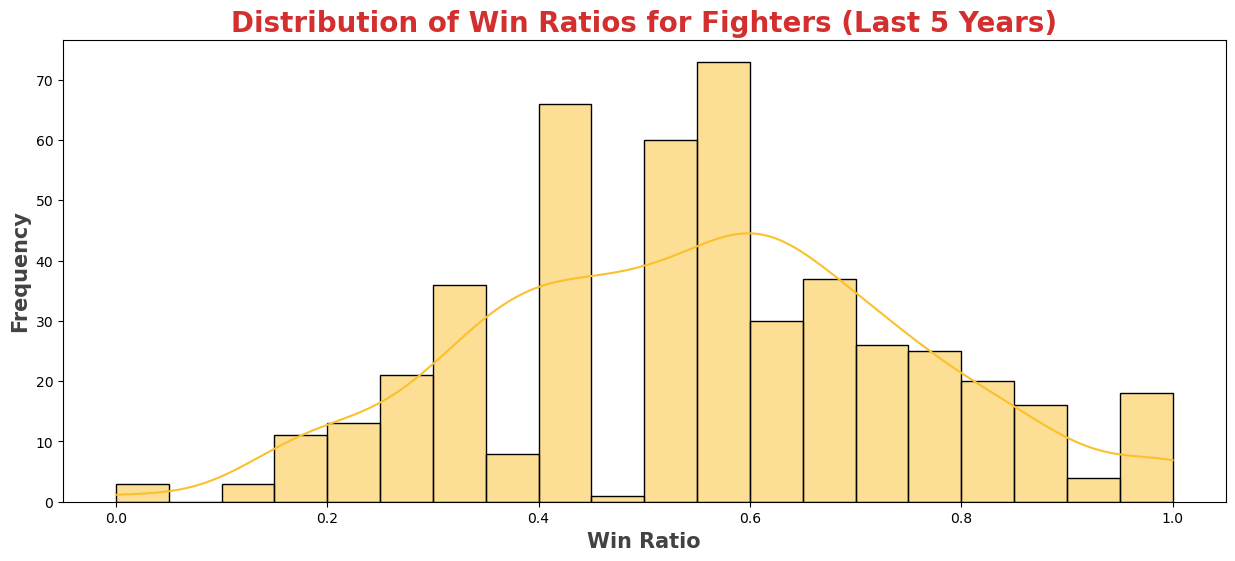

In [41]:
# Filter data to include only the last 5 years (current year: 2024)

current_year = 2024
last_5_years_data = ufc_data[ufc_data['year'] >= current_year - 5]

# Count total number of fights for each fighter (appears as either fighter_1 or fighter_2)

fighter_1_fights = last_5_years_data['fighter_1'].value_counts().reset_index()
fighter_2_fights = last_5_years_data['fighter_2'].value_counts().reset_index()

# Rename columns for easier merging

fighter_1_fights.columns = ['fighter', 'total_fights_fighter_1']
fighter_2_fights.columns = ['fighter', 'total_fights_fighter_2']

# Merge total fights data for both fighter_1 and fighter_2

fighter_fights = pd.merge(fighter_1_fights, fighter_2_fights, on='fighter', how='outer')
fighter_fights.fillna(0, inplace=True)  # Fill missing values with 0

# Calculate total number of fights per fighter

fighter_fights['total_fights'] = fighter_fights['total_fights_fighter_1'] + fighter_fights['total_fights_fighter_2']

# Count total wins per fighter (winner column)

wins = last_5_years_data['winner'].value_counts().reset_index()
wins.columns = ['fighter', 'wins']

# Merge the win counts with the total fight counts

fighter_stats = pd.merge(fighter_fights, wins, on='fighter', how='left')
fighter_stats.fillna(0, inplace=True)  # Fill missing wins with 0

# Calculate win ratio (wins / total_fights)

fighter_stats['win_ratio'] = fighter_stats['wins'] / fighter_stats['total_fights']

# Filter out fighters with fewer than 5 fights to avoid bias from low-sample fighters

fighter_stats = fighter_stats[fighter_stats['total_fights'] >= 5]

# Sort by win ratio

fighter_stats_sorted = fighter_stats.sort_values(by='win_ratio', ascending=False)

# Display the top 20 fighters with highest win ratios in the last 5 years

top_20_fighters_last_5_years = fighter_stats_sorted.head(20)

# Check distribution of win ratios to identify any potential issues

plt.figure(figsize=(15, 6))
sns.histplot(fighter_stats['win_ratio'], bins=20, kde=True, color="#FBC02D")
plt.title('Distribution of Win Ratios for Fighters (Last 5 Years)', fontweight = 'heavy', color = "#D32F2F", size = 20)
plt.xlabel('Win Ratio', fontweight = 'heavy', size = 15, color = '#424242')
plt.ylabel('Frequency', fontweight = 'heavy', size = 15, color = '#424242')
plt.show()

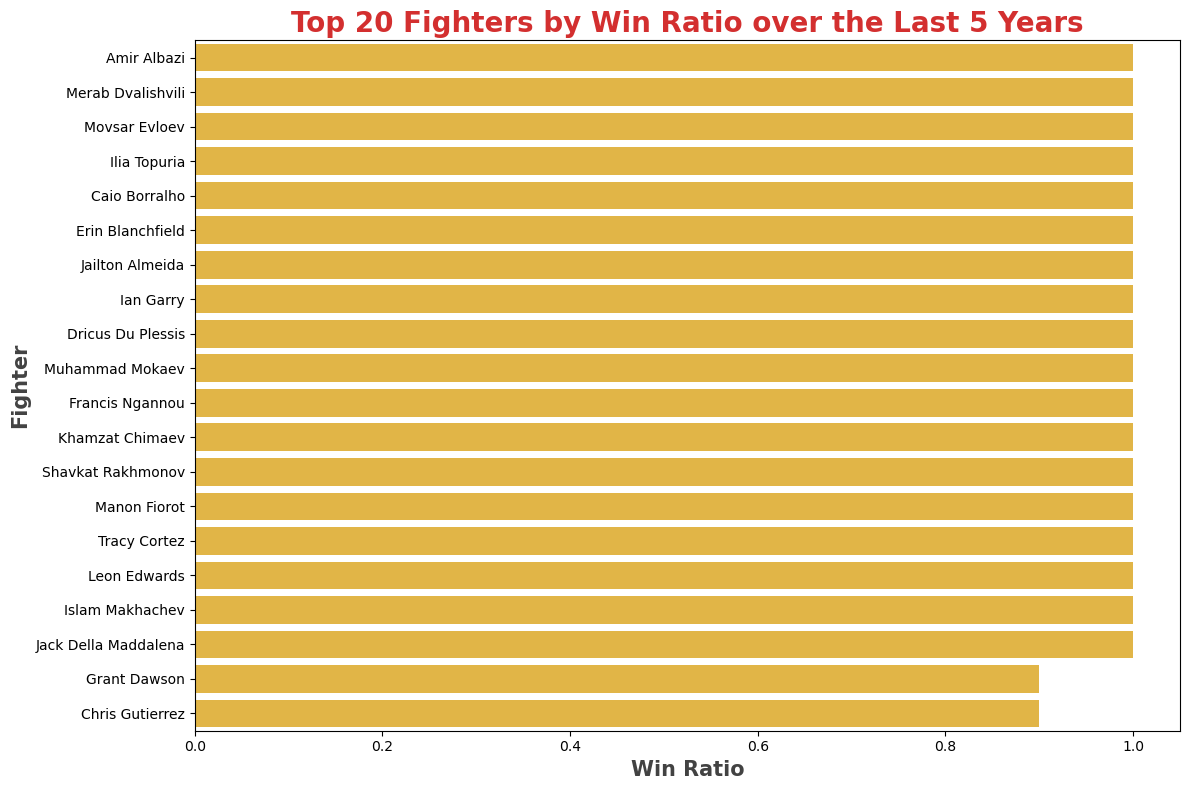

In [42]:
# Plot a bar chart of top 20 fighters by win ratio
plt.figure(figsize=(12, 8))
sns.barplot(x='win_ratio', y='fighter', data=top_20_fighters_last_5_years, color="#FBC02D")
plt.title('Top 20 Fighters by Win Ratio over the Last 5 Years', fontweight = 'heavy', color = "#D32F2F", size = 20)
plt.xlabel('Win Ratio', fontweight = 'heavy', size = 15, color = '#424242')
plt.ylabel('Fighter', fontweight = 'heavy', size = 15, color = '#424242')
plt.tight_layout()  # Adjust layout to avoid label overlap
plt.show()

**Observation:** <br>
The bar chart showcasing the top 20 UFC fighters by win ratio over the last five years reveals that the top 18 fighters have nearly identical win ratios. This includes high-profile fighters like Ilia Topuria, Dricus Du Plessis, Khamzat Chimaev, and Islam Makhachev. Their similar win ratios reflect tight competition and dominance within their divisions. This supports the hypothesis that historically significant weight classes such as Lightweight and Welterweight feature a high concentration of competitive fighters with strong, consistent win records.

---

**Question 3:** What are the common methods of victory? <br>
**Hypothesis:** KO/TKO is the most common victory method in the UFC, especially in heavier weight classes.

In [46]:
# Count the occurrence of each victory method

victory_methods = ufc_data['method'].value_counts()

# Display the count for each method

print(victory_methods)

method
U-DEC                          2609
KO/TKO Punches                  914
KO/TKO Punch                    812
S-DEC                           704
SUB Rear Naked Choke            563
                               ... 
Overturned Knee                   1
Overturned Rear Naked Choke       1
KO/TKO Headbutts                  1
KO/TKO Headbutt                   1
Overturned D'Arce Choke           1
Name: count, Length: 70, dtype: int64


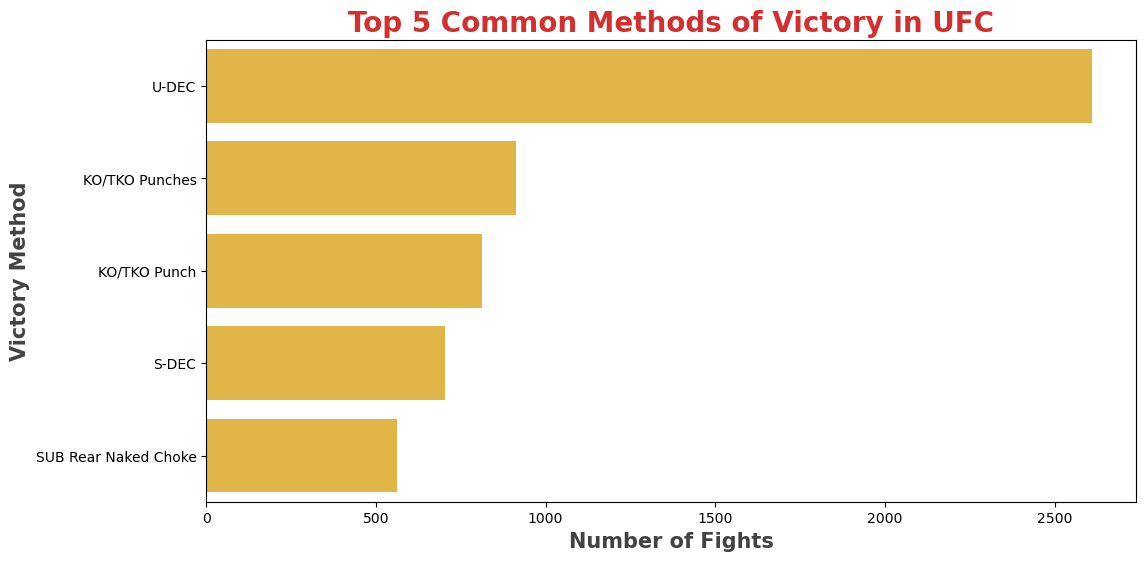

In [47]:
# Get the top 5 most common victory methods

top_5_victory_methods = victory_methods.head(5)

# Plot the top 5 methods

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_victory_methods.values, y=top_5_victory_methods.index, color="#FBC02D")
plt.title('Top 5 Common Methods of Victory in UFC', fontweight = 'heavy', color = "#D32F2F", size = 20)
plt.xlabel('Number of Fights', fontweight = 'heavy', size = 15, color = '#424242')
plt.ylabel('Victory Method', fontweight = 'heavy', size = 15, color = '#424242')
plt.show()


**Observation:** <br>
According to the data, Unanimous Decisions (U-DEC) are the most common method of victory in the UFC, with a total of 2609 victories, surpassing the combined category of KO/TKO Punches (914) and KO/TKO Punch (812), which together account for 1726 victories. While KO/TKO methods are significant, U-DEC clearly dominates as the leading victory method overall. This analysis does not support the hypothesis that KO/TKO is the most common method overall, though further investigation into specific weight classes may reveal a stronger prevalence of KO/TKO in heavier divisions.

In [49]:
# Identify the top 10 most common victory methods

top_victory_methods = ufc_data['method'].value_counts().head(10).index

# Identify the top 10 most common weight classes

top_weight_classes = ufc_data['weight_class'].value_counts().head(10).index

# Filter the dataset for only the top methods and weight classes

filtered_data = ufc_data[
    (ufc_data['method'].isin(top_victory_methods)) & 
    (ufc_data['weight_class'].isin(top_weight_classes))
]

# Group data by weight class and victory method

victory_by_weight_class = (
    filtered_data.groupby('weight_class')['method']
    .value_counts()
    .unstack()
    .fillna(0)
)

# Display the grouped data

print(victory_by_weight_class)

method               KO/TKO  KO/TKO Elbows  KO/TKO Kick  KO/TKO Punch  \
weight_class                                                            
Bantamweight              3              7           13            67   
Featherweight             9              8           14            81   
Flyweight                 6              3            5            32   
Heavyweight              15             14           14           124   
Light Heavyweight        18             16           15           104   
Lightweight              29             13           35           134   
Middleweight             28             21           34           103   
Welterweight             25             17           36           137   
Women's Flyweight         3              6            4             5   
Women's Strawweight       3              3            4             8   

method               KO/TKO Punches  S-DEC  SUB Armbar  SUB Guillotine Choke  \
weight_class                               

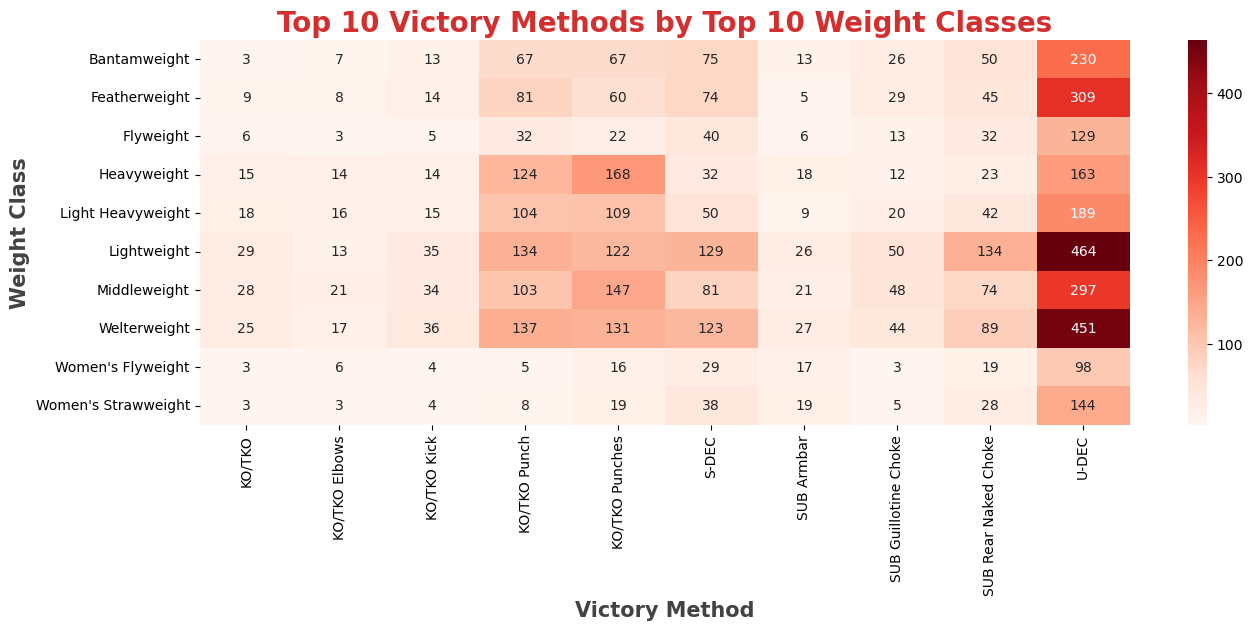

In [169]:
# Visualize as a heatmap

plt.figure(figsize=(15, 5))
sns.heatmap(victory_by_weight_class, annot=True, fmt='.0f', cmap='Reds', cbar=True)
plt.title('Top 10 Victory Methods by Top 10 Weight Classes', fontweight = 'heavy', color = "#D32F2F", size = 20)
plt.xlabel('Victory Method', fontweight = 'heavy', size = 15, color = '#424242')
plt.ylabel('Weight Class', fontweight = 'heavy', size = 15, color = '#424242')
plt.show()

**Observation:** <br>
The heatmap analysis of the top 10 victory methods across the top 10 weight classes reveals that KO/TKO is indeed the most common victory method in the Heavyweight and Light Heavyweight divisions, aligning with the hypothesis that heavier fighters tend to end fights with knockouts due to their power. However, Unanimous Decision (U-DEC) emerges as the most common victory method overall, especially in the Lightweight and Welterweight divisions, where fighters are more likely to go the distance and have their fights decided by judges. While KO/TKO is prevalent in heavier weight classes, U-DEC dominates the lighter divisions, suggesting that lighter fighters often engage in more tactical, longer bouts, while heavier fighters rely on their knockout power. This indicates that while KO/TKO is significant in heavier divisions, U-DEC is the most frequent victory method across all weight classes.

---

**Question 4:** How do fighter statistics correlate with victory? <br>
**Hypothesis:** Fighters with longer reach and younger age are more likely to win due to physical advantages and endurance.

**Observation:** <br>
Unfortunately, our current dataset lacks the necessary data and variables, such as fighters' statistics. Therefore, we need to find a suitable dataset to effectively address our research question. <br>

In [55]:
# Download programmatically the dataset from Kaggle using the Kaggle API

!kaggle datasets download -d asaniczka/ufc-fighters-statistics

ufc-fighters-statistics.zip: Skipping, found more recently modified local copy (use --force to force download)


In [56]:
# Extract the file from the download zip file

zipfile_name = 'ufc-fighters-statistics.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [57]:
# Read in the csv file as a pandas dataframe

fighter_stats = pd.read_csv('ufc-fighters-statistics.csv', encoding = 'latin1')

In [58]:
# Have a first look at the dataset

fighter_stats.head(5)

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


Let's first explore and preprocess the new dataset!

In [60]:
# Show the data structure

fighter_stats.shape

(4111, 18)

In [61]:
# Illustrate more info about the dataset

fighter_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

In [62]:
# Rename the necessary columns

fighter_stats.rename(columns= {"height_cm":"height", "weight_in_kg":"weight", "reach_in_cm":"reach"}, inplace= True)

In [63]:
# Drop unnecessary columns

fighter_stats= fighter_stats.drop(columns=["nickname","significant_strikes_landed_per_minute", "significant_striking_accuracy", "significant_strikes_absorbed_per_minute", "significant_strike_defence", "average_takedowns_landed_per_15_minutes", "takedown_accuracy", "takedown_defense", "average_submissions_attempted_per_15_minutes"])

In [64]:
# Check for missing values

fighter_stats.isna().sum()

name                0
wins                0
losses              0
draws               0
height            298
weight             87
reach            1927
stance            823
date_of_birth    1135
dtype: int64

**Observation:** <br>
Our dataset has a significant number of missing values, particularly in the 'reach' column, which constitutes almost half of the dataset. Therefore, it will be challenging to simply remove the missing values. <br>
As a solution, I propose calculating the mean for these columns and then replacing the missing values with their respective means. 

In [66]:
# Calculate the means for the missing values coloumns

means_specific = fighter_stats[['height', 'weight', 'reach']].mean().round(2)

print(means_specific)

height    178.23
weight     77.40
reach     181.81
dtype: float64


In [67]:
# Specify the values to replace missing values in the columns height, weight and reach

values_to_fill = { 'height': 178.23, 'weight':77.40, 'reach':181.81}

# Assign the specified values to the missing values

fighter_filled = fighter_stats.fillna(value=values_to_fill)

In [68]:
# Have a look at our current dataset

fighter_stats.head(5)

,name,wins,losses,draws,height,weight,reach,stance,date_of_birth
0,Robert Drysdale,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05
1,Daniel McWilliams,15,37,0,185.42,83.91,NaN,NaN,NaN
2,Dan Molina,13,9,0,177.80,97.98,NaN,NaN,NaN
3,Paul Ruiz,7,4,0,167.64,61.23,NaN,NaN,NaN
4,Collin Huckbody,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29


In [69]:
# Convert the date_of_birth to datetime

fighter_stats['date_of_birth']= pd.to_datetime(fighter_stats['date_of_birth'])

In [70]:
# Create function to calculate age 

def calculate_age(birthdate): 
    today = dt.datetime.today() 
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day)) 
    return age 

# Apply the calculate_age function to the date_of_birth column 
    
fighter_stats['age'] = fighter_stats['date_of_birth'].apply(calculate_age)

In [71]:
# Drop unnecessary column

fighter_stats= fighter_stats.drop(columns=['date_of_birth'])

In [72]:
# Check for missing values

fighter_stats.isna().sum()

name         0
wins         0
losses       0
draws        0
height     298
weight      87
reach     1927
stance     823
age       1135
dtype: int64

**Observation:** <br>
Let's check the average age then put it to missing values in the age column

In [74]:
# Calculate mean of age

means_age = fighter_stats['age'].mean().astype(int)

print(means_age)

38


In [75]:
# Assign the age mean value to missing value in the column age

fighter_stats = fighter_stats.fillna(value= means_age.astype(int))

In [76]:
# Convert the age column to integer type 

fighter_stats['age'] = fighter_stats['age'].astype(int)

In [77]:
# Have a look at the processed dataset

fighter_stats.head(5)

,name,wins,losses,draws,height,weight,reach,stance,age
0,Robert Drysdale,7,0,0,190.50,92.99,38.00,Orthodox,43
1,Daniel McWilliams,15,37,0,185.42,83.91,38.00,38,38
2,Dan Molina,13,9,0,177.80,97.98,38.00,38,38
3,Paul Ruiz,7,4,0,167.64,61.23,38.00,38,38
4,Collin Huckbody,8,2,0,190.50,83.91,193.04,Orthodox,30


The dataset looks great! Let's start our analysis.

            wins    weight     reach       age
wins    1.000000  0.027332  0.231261  0.181946
weight  0.027332  1.000000 -0.119547  0.341073
reach   0.231261 -0.119547  1.000000 -0.366305
age     0.181946  0.341073 -0.366305  1.000000


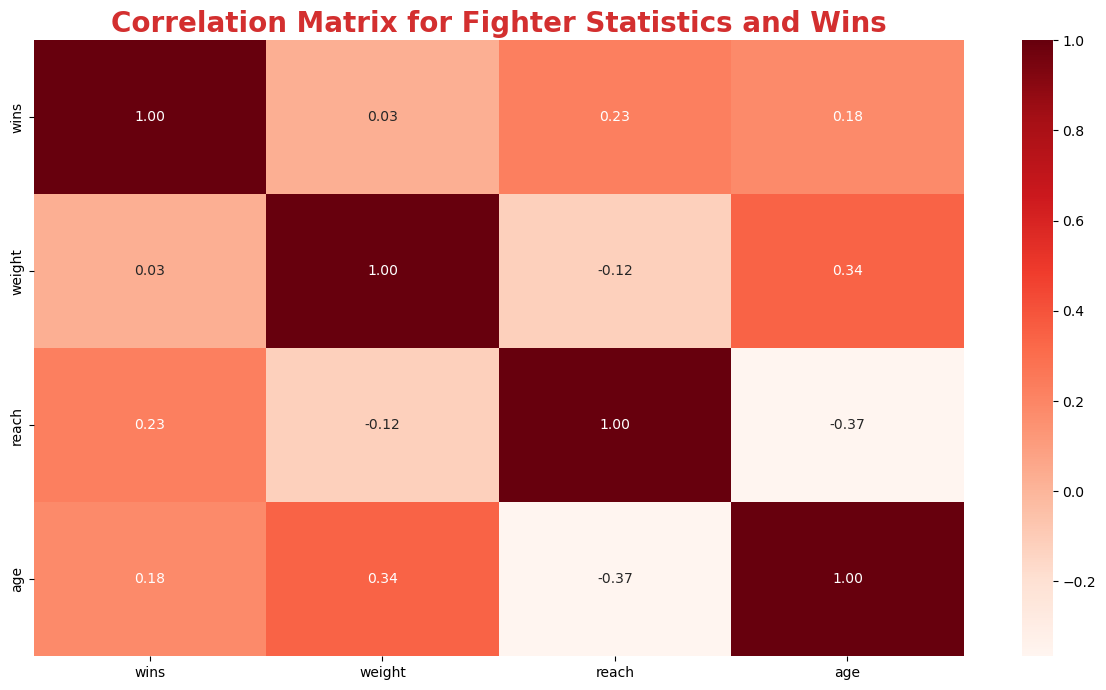

In [173]:
# Select relevant columns for correlation analysis

correlation_data = fighter_stats[['wins', 'weight', 'reach', 'age']]

# Calculate the correlation matrix

correlation_matrix = correlation_data.corr()

# Display the correlation matrix

print(correlation_matrix)

# Visualize the correlation matrix

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Matrix for Fighter Statistics and Wins', fontweight = 'heavy', color = "#D32F2F", size = 20)
plt.show()

**Observation:** <br>
The correlation matrix reveals weak relationships between fighter statistics and the number of wins. Age shows a slight positive correlation with wins (0.18), suggesting younger fighters may have an endurance advantage, partially supporting the hypothesis. However, reach has an even weaker correlation with wins (0.07), challenging the notion that longer reach significantly impacts victory. Weight shows no meaningful relationship with wins (-0.02), indicating that being heavier does not confer a notable advantage. Stronger correlations between attributes like weight and reach (0.48) and weight and age (0.36) highlight that heavier fighters tend to be older with longer reach, but these attributes do not strongly predict success. Thus, while physical advantages like age and reach may play minor roles, skill, strategy, and experience are likely the primary determinants of victory in the UFC.

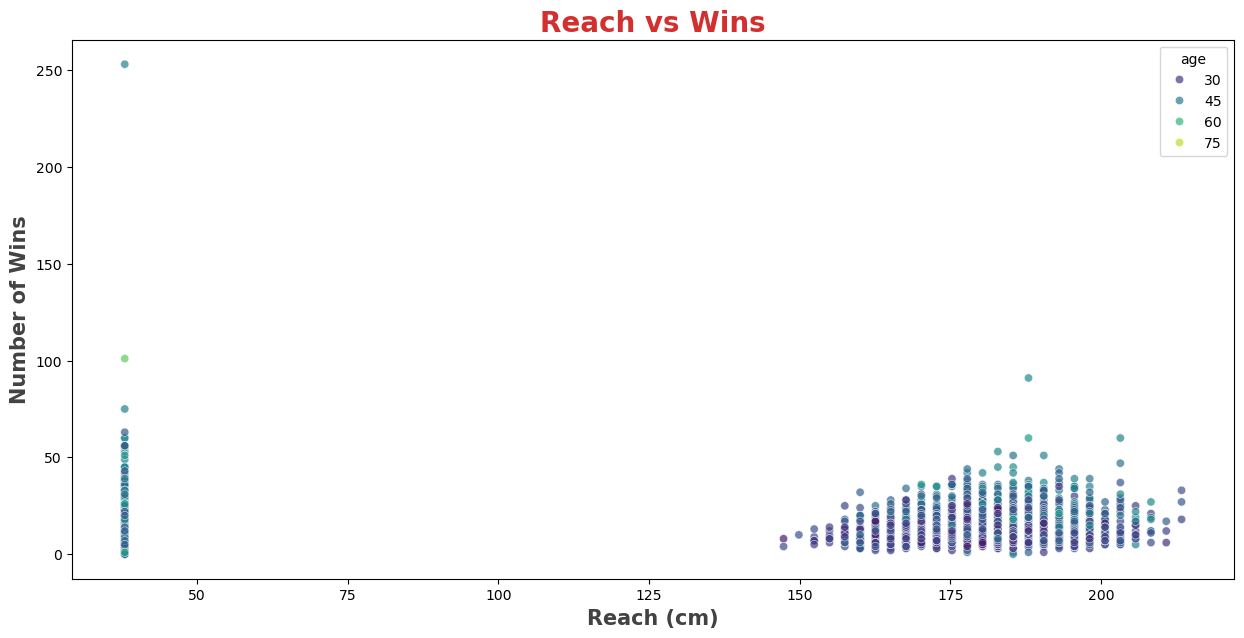

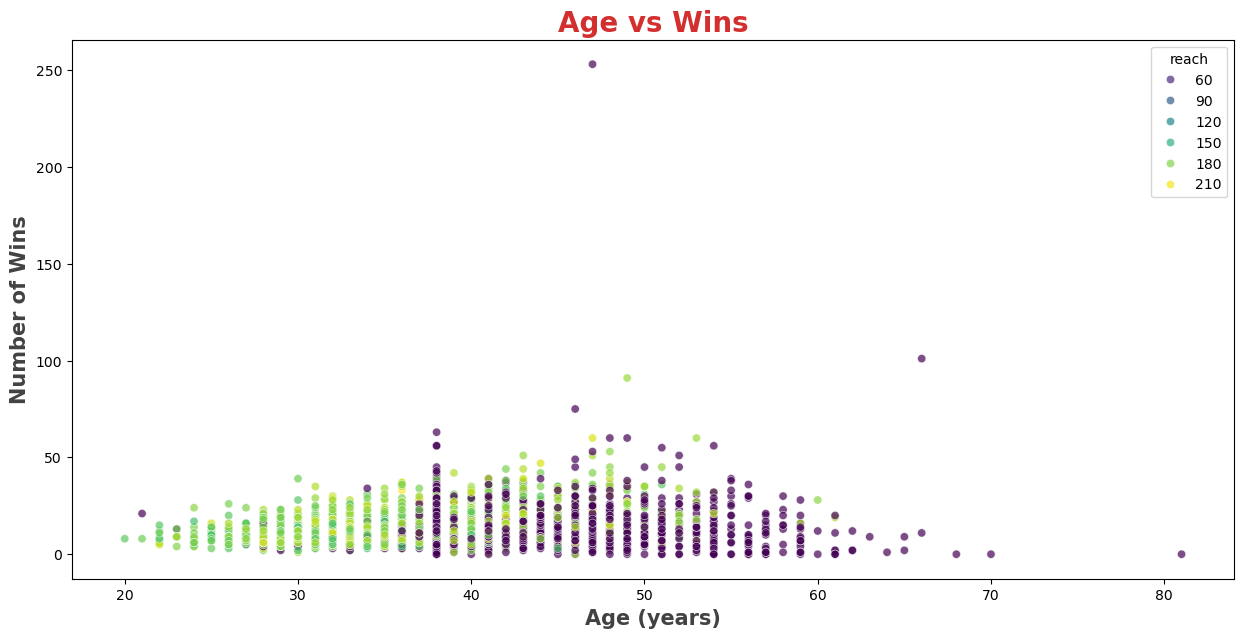

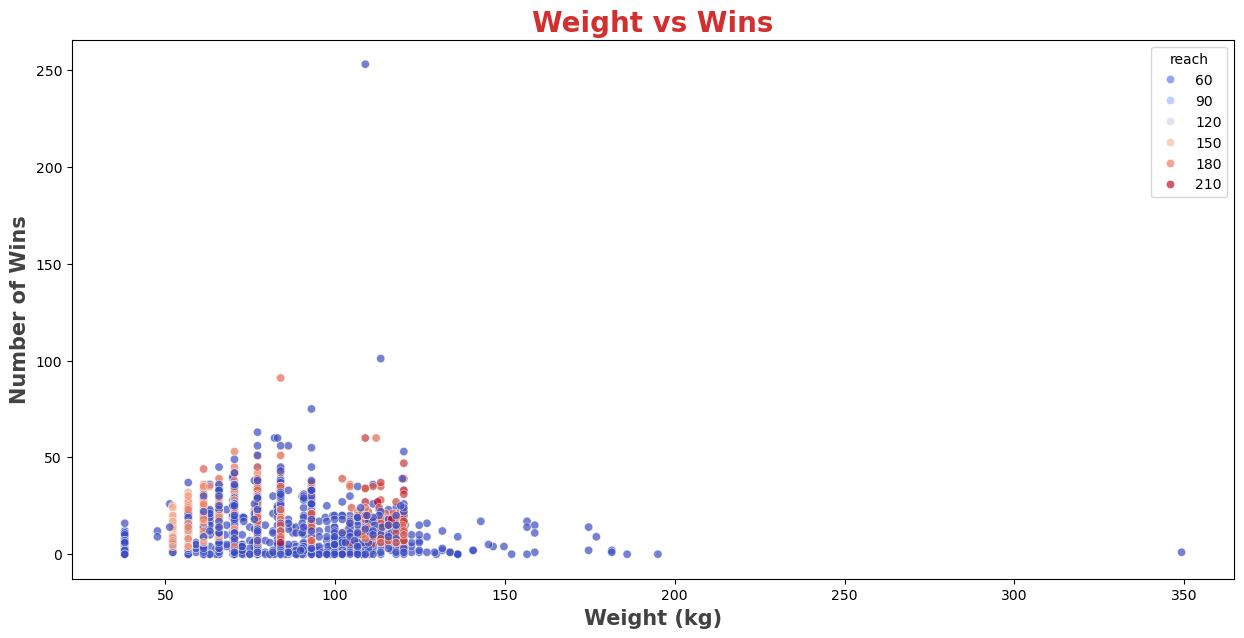

In [81]:
# Scatterplot: Reach vs Wins
plt.figure(figsize=(15, 7))
sns.scatterplot(data=fighter_stats, x='reach', y='wins', hue='age', palette='viridis', alpha=0.7)
plt.title('Reach vs Wins', fontweight = 'heavy', color = "#D32F2F", size = 20)
plt.xlabel('Reach (cm)', fontweight = 'heavy', size = 15, color = '#424242')
plt.ylabel('Number of Wins', fontweight = 'heavy', size = 15, color = '#424242')
plt.show()

# Scatterplot: Age vs Wins
plt.figure(figsize=(15, 7))
sns.scatterplot(data=fighter_stats, x='age', y='wins', hue='reach', palette='viridis', alpha=0.7)
plt.title('Age vs Wins', fontweight = 'heavy', color = "#D32F2F", size = 20)
plt.xlabel('Age (years)', fontweight = 'heavy', size = 15, color = '#424242')
plt.ylabel('Number of Wins', fontweight = 'heavy', size = 15, color = '#424242')
plt.show()

# Scatterplot: Weight vs Wins
plt.figure(figsize=(15, 7))
sns.scatterplot(data=fighter_stats, x='weight', y='wins', hue='reach', palette='coolwarm', alpha=0.7)
plt.title('Weight vs Wins', fontweight = 'heavy', color = "#D32F2F", size = 20)
plt.xlabel('Weight (kg)', fontweight = 'heavy', size = 15, color = '#424242')
plt.ylabel('Number of Wins', fontweight = 'heavy', size = 15, color = '#424242')
plt.show()

Let's try to quantify how each attribute predicts the number of wins through linear regression model!

In [83]:
# Prepare data for regression

X = fighter_stats[['reach', 'age', 'weight']]
y = fighter_stats['wins']

# Split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set

y_pred = model.predict(X_test)

# Evaluate the model

print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Regression Coefficients: [ 0.0452407   0.47804952 -0.01874587]
Intercept: -9.774131403673106
Mean Squared Error: 69.12455107465178
R-squared Score: 0.12248070481904716


**Observation:** <br>
The regression analysis results indicate that the relationship between fighter statistics (reach, age, weight) and the number of wins is relatively weak. The coefficients show that age has the strongest positive influence on wins (0.478), aligning with the correlation matrix observation (0.18) that younger fighters may have an endurance advantage. Reach has a very small positive impact (0.045), suggesting that while longer reach might provide a slight advantage, it is not a decisive factor, consistent with the weak correlation (0.07). Weight has a negligible and slightly negative coefficient (-0.018), further confirming that being heavier does not contribute significantly to winning, as also indicated in the correlation matrix (-0.02). The low R-squared value (0.12) implies that only 12% of the variance in wins is explained by these attributes, highlighting that other factors—such as skill, strategy, and experience—play a much larger role. These findings support the research question by showing limited correlation between physical attributes and victories and partially support the hypothesis, as age has some influence, but reach and weight are not strongly predictive of success.

---

**Question 5:** Can we predict fight outcomes using regression? <br>
**Hypothesis:** Fighters with longer reach, higher win ratios, and lighter weight classes are more likely to win by KO/TKO.

In [87]:
ufc_data.head(5)

,location,fighter_1,fighter_2,fighter_1_kd,fighter_2_kd,fighter_1_str,fighter_2_str,fighter_1_td,fighter_2_td,fighter_1_sub,fighter_2_sub,weight_class,method,round,time,event_name,date,winner,year,month
0,"Austin, Texas, USA",Arman Tsarukyan,Beneil Dariush,1.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punch,1.0,1:04,UFC Fight Night,2023-12-02,Arman Tsarukyan,2023,12
1,"Austin, Texas, USA",Jalin Turner,Bobby Green,1.0,0.0,33.0,15.0,0.0,0.0,0.0,0.0,Lightweight,KO/TKO Punches,1.0,2:49,UFC Fight Night,2023-12-02,Jalin Turner,2023,12
2,"Austin, Texas, USA",Deiveson Figueiredo,Rob Font,0.0,0.0,45.0,46.0,4.0,0.0,0.0,0.0,Bantamweight,U-DEC,3.0,5:00,UFC Fight Night,2023-12-02,Deiveson Figueiredo,2023,12
3,"Austin, Texas, USA",Sean Brady,Kelvin Gastelum,0.0,0.0,14.0,18.0,5.0,0.0,3.0,0.0,Welterweight,SUB Kimura,3.0,1:43,UFC Fight Night,2023-12-02,Sean Brady,2023,12
4,"Austin, Texas, USA",Joaquim Silva,Clay Guida,0.0,0.0,46.0,43.0,2.0,2.0,2.0,0.0,Lightweight,U-DEC,3.0,5:00,UFC Fight Night,2023-12-02,Joaquim Silva,2023,12


In the "method" column, we have various entries for the KO/TKO methods of winning. We need to standardize these entries to ensure they don't affect our analysis. Therefore, we will map all variations of KO/TKO to a single category ("KO/TKO").

In [89]:
# Standardize the 'method' column to map all KO/TKO variations to 'KO/TKO'

ufc_data['method'] = ufc_data['method'].apply(lambda x: 'KO/TKO' if 'KO/TKO' in str(x) else x)

In [90]:
# Create the binary KO_TKO target variable

ufc_data['KO_TKO'] = ufc_data['method'].apply(lambda x: 1 if x == 'KO/TKO' else 0)

In [91]:
# Extract relevant features for modeling

features = ['fighter_1_kd', 'fighter_2_kd', 'fighter_1_str', 'fighter_2_str',
            'fighter_1_td', 'fighter_2_td', 'fighter_1_sub', 'fighter_2_sub']

In [92]:
# Convert 'weight_class' to a numeric categorical feature

ufc_data['weight_class'] = ufc_data['weight_class'].astype('category').cat.codes

In [93]:
# Create feature matrix X and target vector y

X = ufc_data[features + ['weight_class']]
y = ufc_data['KO_TKO']

In [94]:
# Split data into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Standardize the features 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
# Train a Logistic Regression model

log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [97]:
# Predict on the test set

y_pred = log_reg_model.predict(X_test_scaled)

In [98]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8583951449763992
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       977
           1       0.86      0.70      0.77       506

    accuracy                           0.86      1483
   macro avg       0.86      0.82      0.83      1483
weighted avg       0.86      0.86      0.85      1483



**Observation:** <br>
The logistic regression model achieved an accuracy of 85.84%, with a precision of 0.86 and recall of 0.70 for predicting KO/TKO outcomes. The model performed well at identifying non-KO/TKO outcomes (class 0) with high precision and recall, but its ability to identify KO/TKO outcomes (class 1) was weaker, as reflected in the lower recall for class 1 (0.70). This suggests that while the model is relatively effective at predicting non-KO/TKO outcomes, it struggles more with predicting KO/TKO victories. Given the results, the hypothesis that "fighters with longer reach, higher win ratios, and lighter weight classes are more likely to win by KO/TKO" might not be fully supported by the model, especially considering the previous analysis where reach was found to have a weak correlation with fight outcomes. Other factors such as fighter skill, strategy, and experience, which were not included in the model, could play a more significant role in predicting KO/TKO outcomes. For future improvements, we could incorporate more advanced features such as historical performance data, fighter conditioning, or fighting style, and explore other machine learning algorithms like Random Forest or Gradient Boosting to see if they provide better predictive power.

---

The project ends here. You can view the Tableau visualization at the following link: <br>
<br>
https://public.tableau.com/app/profile/herizo.jose.andre.rakotondrampanana/viz/UFCTRENDS/Dashboard1?publish=yes <br>

Check out my other works at: <br>
<br>
https://proherizoja.wixsite.com/herizojoseandre